# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import the OpenWeatherMap API key
from config import open_weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city+'&appid='+open_weather_api_key+'&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | troitsko-pechorsk
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | souris
Processing Record 7 of Set 1 | saint-augustin
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | venezuela
Processing Record 10 of Set 1 | vengerovo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | dashitou
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | namatanai
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | luganville
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | sterling
Processing Record 22 of Set 1

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,troitsko-pechorsk,62.7084,56.1964,-17.25,99,100,2.56,RU,1670288166
1,georgetown,5.4112,100.3354,27.35,92,20,0.51,MY,1670288166
2,punta arenas,-53.1500,-70.9167,7.06,53,40,5.66,CL,1670288167
3,puerto ayora,-0.7393,-90.3518,21.42,94,29,2.68,EC,1670288167
4,albany,42.6001,-73.9662,3.66,55,96,2.39,US,1670288168


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,troitsko-pechorsk,62.7084,56.1964,-17.25,99,100,2.56,RU,1670288166
1,georgetown,5.4112,100.3354,27.35,92,20,0.51,MY,1670288166
2,punta arenas,-53.1500,-70.9167,7.06,53,40,5.66,CL,1670288167
3,puerto ayora,-0.7393,-90.3518,21.42,94,29,2.68,EC,1670288167
4,albany,42.6001,-73.9662,3.66,55,96,2.39,US,1670288168


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

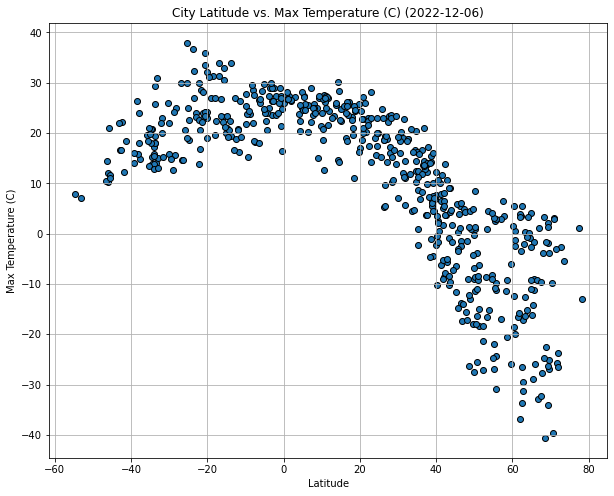

In [88]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature (C) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((10,8))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

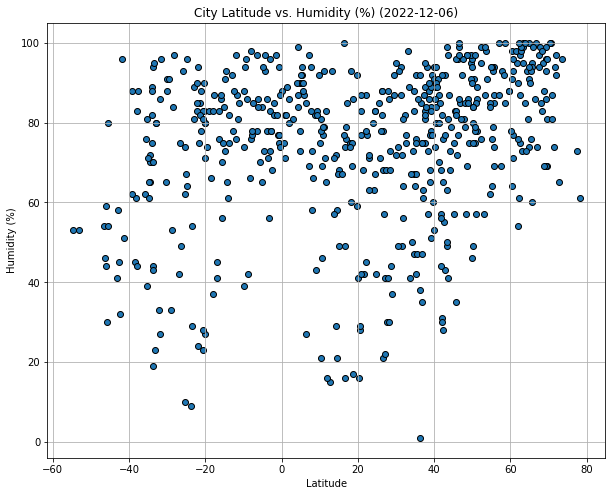

In [89]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((10,8))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

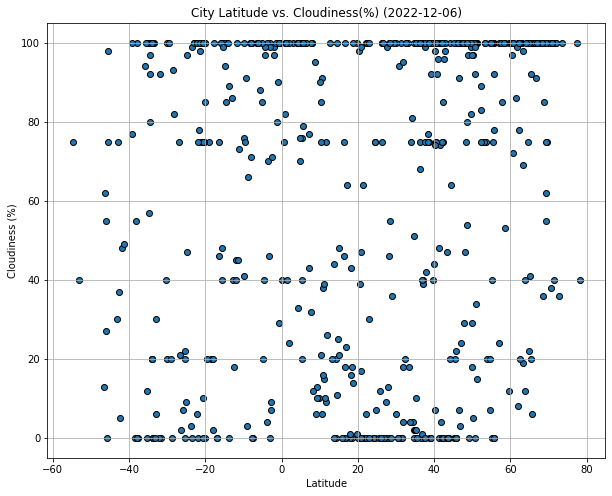

In [90]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness(%) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((10,8))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

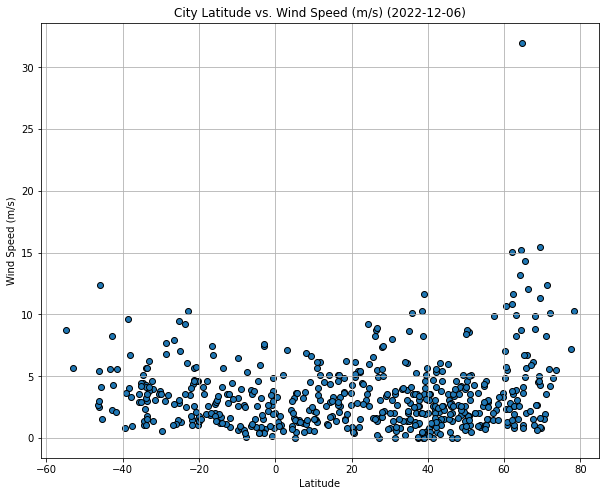

In [91]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed (m/s) ({date.today()})')
plt.grid(visible=True)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches((10,8))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    slope, intercept, r, p, std_err = linregress(x,y)
    line_eq = slope*x+intercept
    line_str = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,line_eq,'r-')
    plt.gcf().set_size_inches((10,8))
    plt.gcf().set_facecolor('white')
    plt.annotate(line_str,(0.1,0.1),xycoords='axes fraction',fontsize=15,color="red")
    print('The r-value is: '+str(r))
    plt.show()
    

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,troitsko-pechorsk,62.7084,56.1964,-17.25,99,100,2.56,RU,1670288166
1,georgetown,5.4112,100.3354,27.35,92,20,0.51,MY,1670288166
4,albany,42.6001,-73.9662,3.66,55,96,2.39,US,1670288168
5,souris,49.6172,-100.2612,-17.92,95,82,1.41,CA,1670288168
6,saint-augustin,51.2260,-58.6502,-6.16,86,15,0.48,CA,1670288169


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,7.06,53,40,5.66,CL,1670288167
3,puerto ayora,-0.7393,-90.3518,21.42,94,29,2.68,EC,1670288167
10,ushuaia,-54.8000,-68.3000,7.79,53,75,8.75,AR,1670288171
12,atuona,-9.8000,-139.0333,25.36,74,41,6.49,PF,1670288171
13,namatanai,-3.6667,152.4333,28.86,71,70,3.28,PG,1670288172


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8358592604187808


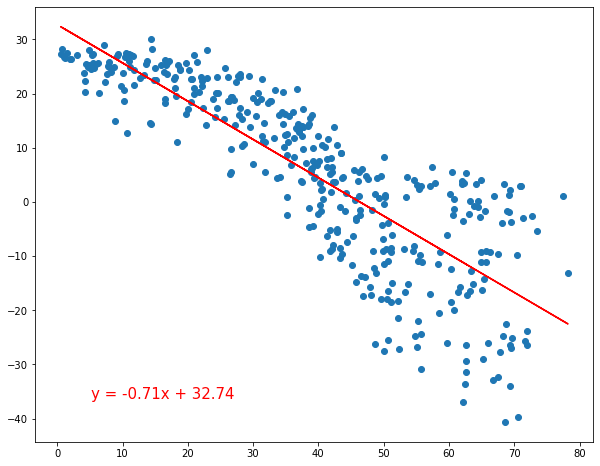

In [114]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])


The r-value is: 0.5323186037390578


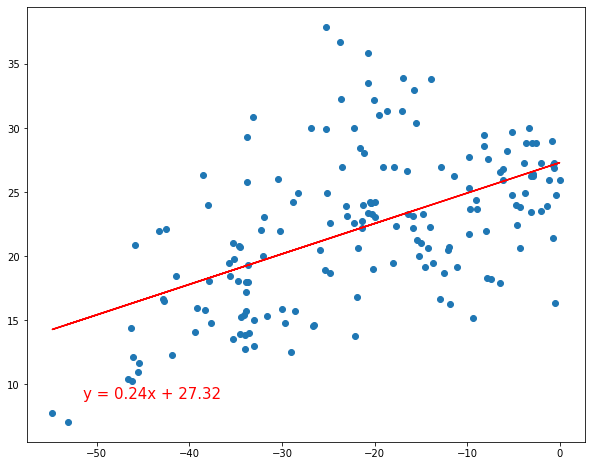

In [115]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** We can clearly see as latitude approaches 0 (the equator), temperature tends to increase (warmer temperatures). This is indicated by the negative relationship shown in the Northern Hemisphere (temperature decreases as latitude increases away from zero), while the Southern Hemisphere shows a positive relationship (temperature increases as latitude increases toward zero). For the Northern Hemisphere, the r-value magnitude is 0.83, which is a relatively strong correlation, while the Southern Hemisphere presents an r-value magnitude of 0.53, a more moderate correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2995574529475545


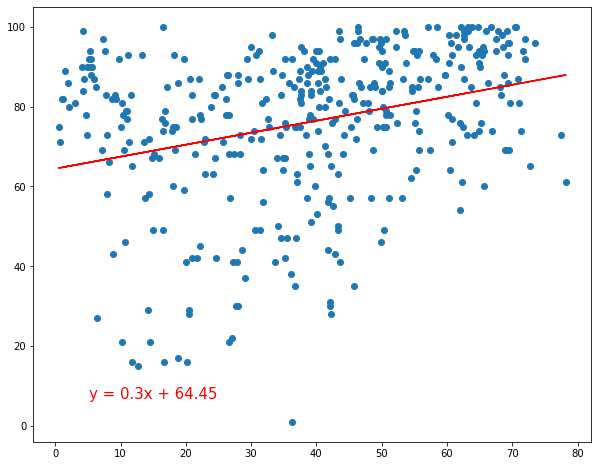

In [116]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is: 0.3718496409639633


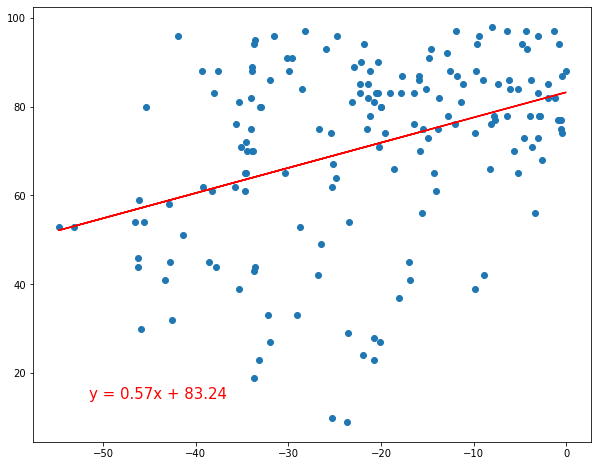

In [117]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** In both hemispheres, there is a positive correlation between latitude and humidity. As a caveat, these scatter plots seem to have a much weaker relationship (smaller r-values) than the temperature/latitude plots.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2523292384110175


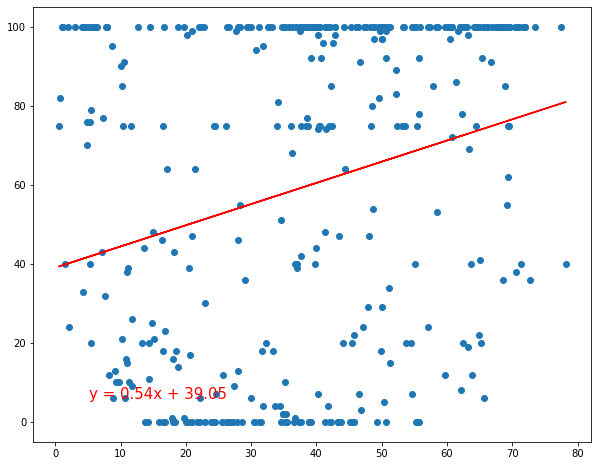

In [118]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r-value is: 0.24004758726432526


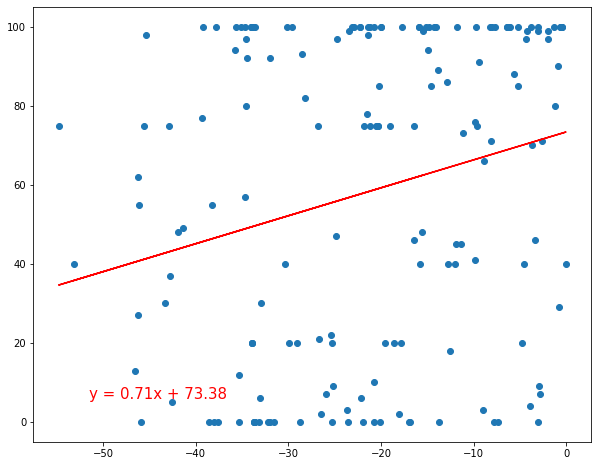

In [119]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The r-values of 0.24 and 0.25 signify relatively little relationship between cloudiness and latitude; in fact, these are the weakest pair of r-values. Visually, we can see the many points at the top (100%) and bottom (0%) of each plot which lends itself to low correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.24578012464838772


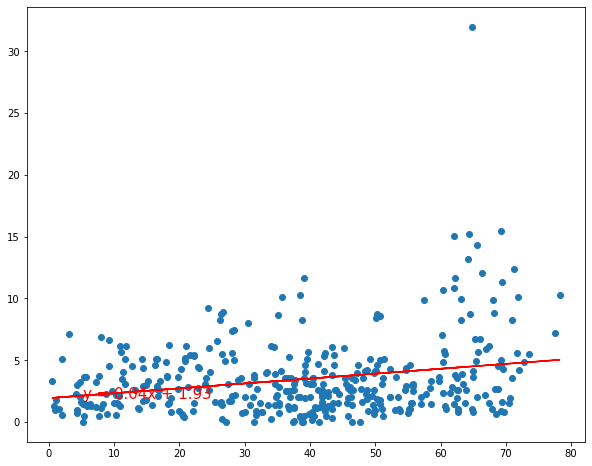

In [120]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r-value is: -0.31859124119686577


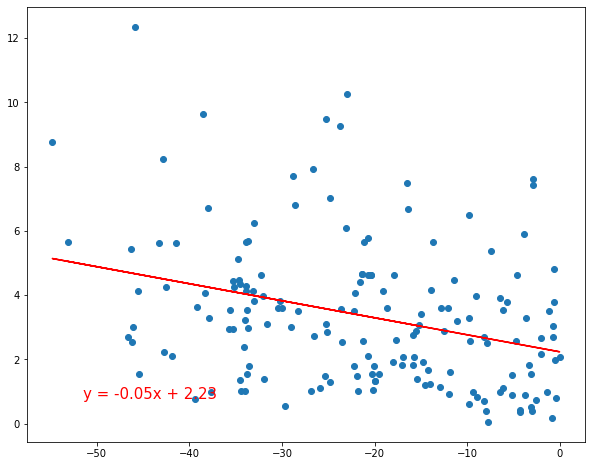

In [121]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Much like the cloudiness plots, wind speed and latitude have very weak correlation. The r-values here are a little higher, but not by much. We don't have many points reaching the floor/ceiling in these plots, so the relationship holds a bit stronger. However, we do have some 'outlier-like' points that may be weakening/lowering the correlation coefficient.